## Generación de variables aleatorias correlacionadas

In [98]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mcerp import correlate, correlation_matrix
from mcerp import Beta, N, Exp, PERT
from mcerp import uv, stats

from scipy import stats as stats
from scipy.stats import rv_continuous, beta, genextreme, rv_histogram
import scipy.optimize as opt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = '{:.3f}'.format



In [63]:
# parametros de las distribuciones:
min, mode, max, lmb = 8000.0, 12000.0, 18000.0, 4.0         # volumen de ventas (distribución PERT)
ms, ss = 20.0, 1.0                                          # precio de venta (dist normal)
mm, sm = 13.0, 0.7                                          # costo unitario de material (dist normal)
o = 3.0                                                     # otro costo unitario (deterministico)

In [123]:
# variables aleatorias  de entrada a la simulación:
v1 = PERT(min, mode, max, lmb)                  # volumen de ventas (distribución PERT)
p1 = N(ms, ss)                                  # precio de venta (dist normal)
m1 = N(mm, sm)                                  # costo unitario de material (dist normal)
o1 = o                                          # otro costo unitario (deterministico)


# variables de salida (modelos matemático):
GP1 = v1 * (p1 - m1 - o1)                       # utilidad bruta
R1 = v1 * p1                                    # ingresos totales
GM1 = GP1 / R1                                  # margen bruto
C1 = R1 - GP1                                   # costos totales

In [57]:
#npts = 10

In [65]:
# Ejecucion de la simulacion

# generación de números aleatorios 
rv1 = v1._mcpts
rp1 = p1._mcpts
rm1 = m1._mcpts
rGP1 = GP1._mcpts
rR1 = R1._mcpts
rGM1 = GM1._mcpts

# combinar resultados en un arregloe
rand1 = np.vstack((rv1, rp1, rm1, rGP1, rR1, rGM1))

# crear dataframe
df1 = pd.DataFrame(data=rand1).T 
df1.rename(columns={ 
    0:"Volumen", 1:"Precio", 2:"Costo material", 3:"Utilidad bruta", 4:"Ingresos", 5:"Margen bruto"}, 
    inplace=True)
df1


,Volumen,Precio,Costo material,Utilidad bruta,Ingresos,Margen bruto
0,10998.360,20.265,10.796,71145.752,222880.276,0.319
1,14807.957,20.157,12.625,67103.361,298481.771,0.225
2,12868.588,20.336,14.552,35820.467,261694.957,0.137
3,13660.305,19.484,13.747,37382.307,266153.490,0.140
4,16360.753,21.434,12.404,98663.915,350678.797,0.281
...,...,...,...,...,...,...
9995,13318.591,20.619,13.620,53256.903,274612.136,0.194
9996,11389.250,19.290,12.996,37515.415,219700.236,0.171
9997,13054.274,18.972,13.297,34911.940,247659.195,0.141
9998,15166.745,19.030,12.097,59648.227,288620.185,0.207


In [55]:
# función para histogramas
def plot_hist(data, title):
    hist = np.histogram(data, bins=100)
    histdist = rv_histogram(hist)

    X = np.linspace(data.min(), data.max(), 100)
    plt.title(title)
    plt.hist(data, density=False, bins=100)
    plt.plot(X, histdist.pdf(X))
    plt.show()
    
    


In [8]:
# momentos de variables de entrada
def input_moments(v, p, m):
    print("volumen ventas:")
    v1.describe()
    print("precio de venta:")
    p1.describe()
    print("costo unitario de material:")
    m1.describe()

In [56]:
# smomentos de variables de salida 
def output_moments(GP, R, GM, C):
    print("Utilidad bruta:")
    GP1.describe()
    print("Ingresos:")
    R1.describe()
    print("Margen bruto:")
    GM1.describe()
    print("Costo total:")
    C1.describe()

In [57]:
# momentos de variables de entrada
inmom1 = input_moments(v1, p1, m1)
inmom1

volumen ventas:
MCERP Uncertain Value:
 > Mean...................  12333.332680587167
 > Variance...............  3508036.64465618
 > Skewness Coefficient...  0.17800199782368759
 > Kurtosis Coefficient...  2.3758451092819812

precio de venta:
MCERP Uncertain Value:
 > Mean...................  20.000001214466764
 > Variance...............  0.9999303446981855
 > Skewness Coefficient... -0.0002219088146762711
 > Kurtosis Coefficient...  2.996877240913924

costo unitario de material:
MCERP Uncertain Value:
 > Mean...................  13.00001176244402
 > Variance...............  0.4898640562349765
 > Skewness Coefficient...  0.0006580447775476889
 > Kurtosis Coefficient...  2.9934954350590104



In [12]:
# momentos de variables de salida
outmom1 = output_moments(GP1, R1, GM1, C1)
outmom1

Utilidad bruta:
MCERP Uncertain Value:
 > Mean...................  49330.37962385388
 > Variance...............  285478064.73512214
 > Skewness Coefficient...  0.3302960524679644
 > Kurtosis Coefficient...  3.2207641245267804

Ingresos:
MCERP Uncertain Value:
 > Mean...................  246665.17205973496
 > Variance...............  1559372292.4910996
 > Skewness Coefficient...  0.24776522014166552
 > Kurtosis Coefficient...  2.553592716245381

Margen bruto:
MCERP Uncertain Value:
 > Mean...................  0.19799715041653157
 > Variance...............  0.00285020359196173
 > Skewness Coefficient... -0.21219384045944764
 > Kurtosis Coefficient...  3.1252561577433533

Costo total:
MCERP Uncertain Value:
 > Mean...................  197334.7924358811
 > Variance...............  974955470.3074576
 > Skewness Coefficient...  0.22298580679023922
 > Kurtosis Coefficient...  2.490107826252593



In [13]:
mean1 = GP1.mean
std1 = GP1.std
skew1 = GP1.skew
kurt1 = GP1.kurt
moments1 = [mean1, std1, skew1, kurt1]

In [14]:
# matriz de correlación INICIAL
c1 = correlation_matrix([v1, p1, m1])
c1

array([[ 1.   , -0.001,  0.002],
       [-0.001,  1.   ,  0.004],
       [ 0.002,  0.004,  1.   ]])

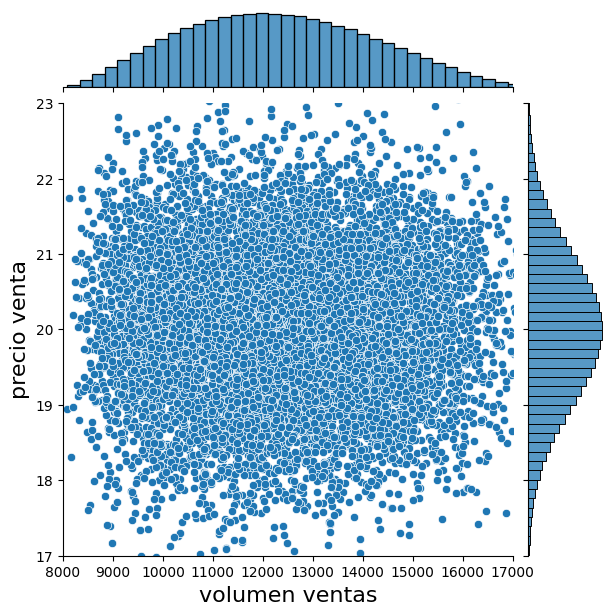

In [15]:
h = sns.jointplot(x=rv1, y=rp1, kind='scatter', xlim=(8000, 17000), ylim=(17, 23))
h.set_axis_labels('volumen ventas', 'precio venta', fontsize=16)

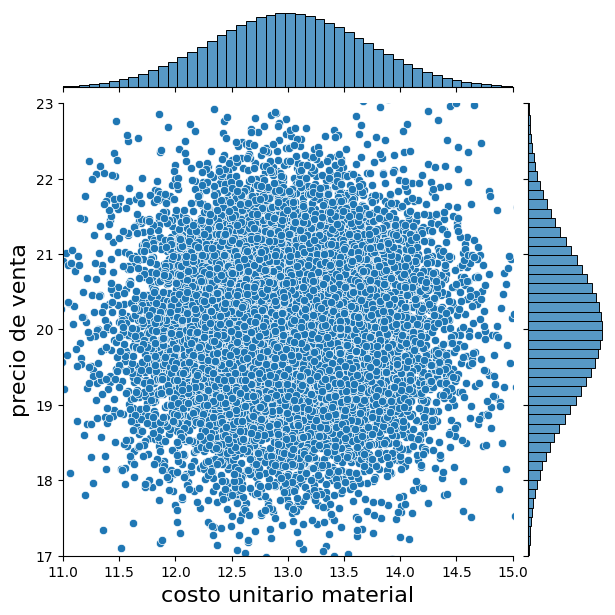

In [16]:
h = sns.jointplot(x=rm1, y=rp1, kind='scatter', xlim=(11, 15), ylim=(17, 23))
h.set_axis_labels('costo unitario material', 'precio de venta', fontsize=16)

In [17]:
v1

uv(12333.319101911084, 3507747.328025893, 0.1778256635724069, 2.3750343047774725)

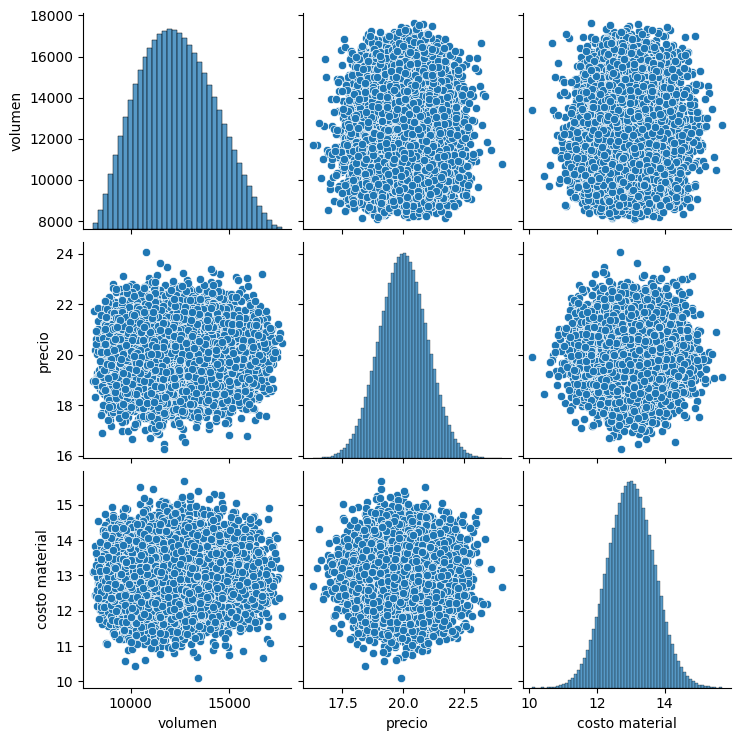

In [18]:
# gráfico de datos iniciales (no correlacionados) 
data0 = pd.DataFrame()
data0["volumen"] = rv1
data0["precio"] = rp1
data0["costo material"] = rm1

sns.pairplot(data=data0)

## Tarea

In [236]:
# matriz de correlación objetivo: volumen, precio, costo unitario de material
c_target = np.array(    [[  1.0, -0.5,  0.2],
                        [  -0.5,  1.0,  0.7],
                        [   0.2,  0.7,  1.0]])

opposite_c_target = np.array( [[  1.0,  0.5, -0.2],
                                    [   0.5,  1.0, -0.7],
                                    [  -0.2, -0.7,  1.0]])  


In [260]:
#Parametros Beta
alpha_material = 3
beta_material =2
lambda_exp=0.1

In [259]:
v2 = PERT(min, mode, max, lmb)
p2 = N(ms, ss) 
m2 = Beta(alpha_material, beta_material)
#m2=Exp(lambda_exp)
o2 = o  
         
##Nuevo set de variables                           # other unit cost, deterministic    

In [261]:
# correlacionar variables de entrada 
correlate([v2, p2, m2], c_target)
#TOma las variables y la matriz de correlacion optima

In [262]:
# revisar matriz de correlación
#La que ya encontramos
c2 = correlation_matrix([v2, p2, m2])
c2

array([[ 1.   , -0.497,  0.199],
       [-0.497,  1.   ,  0.693],
       [ 0.199,  0.693,  1.   ]])

In [263]:
# desviación del objetivo
c2 - c_target

array([[ 0.   ,  0.003, -0.001],
       [ 0.003,  0.   , -0.007],
       [-0.001, -0.007,  0.   ]])

In [264]:
# cambio comparado con la c1
c2 - c1

array([[ 0.   , -0.496,  0.197],
       [-0.496,  0.   ,  0.689],
       [ 0.197,  0.689,  0.   ]])

In [265]:
GP2 = v2 * (p2 - m2 - o2)                       # utilidad bruta
R2 = v2 * p2                                    # ingresos totales
GM2 = GP2 / R2                                  # margen bruto
C2 = R2 - GP2     

In [266]:
# generación de números aleatorios
rv2 = v2._mcpts
rp2 = p2._mcpts
rm2 = m2._mcpts
rGP2 = GP2._mcpts
rR2 = R2._mcpts
rGM2 = GM2._mcpts

# arreglo
rand2 = np.vstack((rv2, rp2, rm2, rGP2, rR2, rGM2))


# dataframe
df2 = pd.DataFrame(data=rand2).T 
df2.rename(columns={ 
    0:"Volumen", 1:"Precio", 2:"Costo material", 3:"Utilidad bruta", 4:"Ingresos", 5:"Margen bruto"}, 
    inplace=True)
df2

,Volumen,Precio,Costo material,Utilidad bruta,Ingresos,Margen bruto
0,11527.898,20.275,0.704,191029.357,233726.465,0.817
1,9672.032,20.688,0.496,166276.029,200093.391,0.831
2,14309.161,19.835,0.796,229507.685,283824.506,0.809
3,10929.734,21.061,0.763,189068.675,230192.577,0.821
4,15456.386,19.765,0.852,245959.573,305491.232,0.805
...,...,...,...,...,...,...
9995,12194.074,21.102,0.776,211270.660,257318.897,0.821
9996,11478.560,19.620,0.416,185997.830,225208.876,0.826
9997,13408.702,20.977,0.861,229499.296,281275.896,0.816
9998,15639.304,20.185,0.892,254810.230,315685.508,0.807


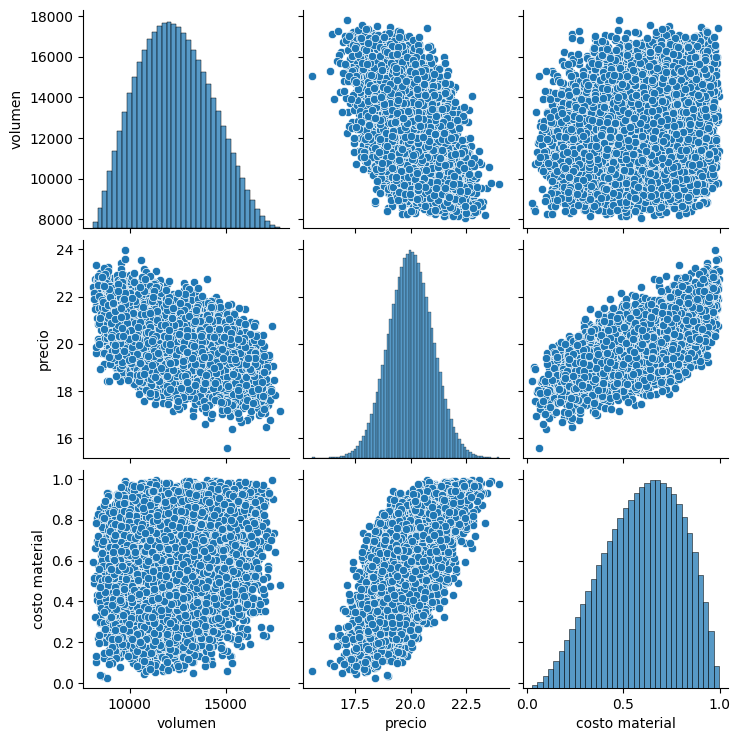

In [267]:
# plot updated data (correlated)
datac = pd.DataFrame()
datac["volumen"] = rv2
datac["precio"] = rp2
datac["costo material"] = rm2

sns.pairplot(data=datac)


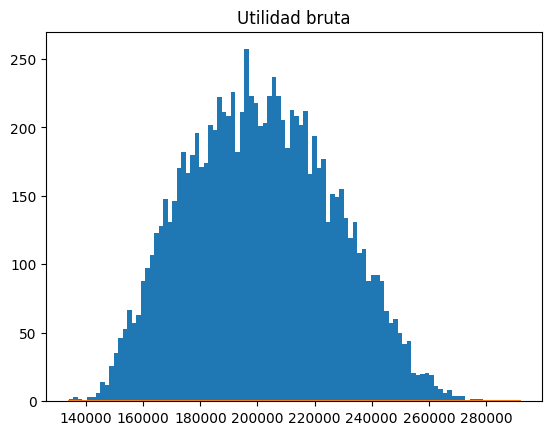

In [268]:
# histograma de utilidad bruta
plot_hist(rGP2, "Utilidad bruta")

In [247]:
# comparar momentos de las variables de salida de las dos simulaciones
nombres_momentos = ["media", "desv_est", "asim", "curt"]
moments2 = [GP2.mean, GP2.std, GP2.skew, GP2.kurt]

df = pd.DataFrame([moments1, moments2], columns=nombres_momentos).T
df.rename(columns={0:"indep", 1:"corr"}, inplace=True)
df["cambio"] = df["corr"] - df["indep"] 
df["%cambio"] = df["corr"] / df["indep"] 
print("Impacto de la correlación en la estimación de la utilidad bruta:")
df

Impacto de la correlación en la estimación de la utilidad bruta:


,indep,corr,cambio,%cambio
media,49330.380,90629.395,41299.015,1.837
desv_est,16896.096,131980.511,115084.415,7.811
asim,0.330,-1.506,-1.836,-4.560
curt,3.221,6.710,3.489,2.083


In [248]:
# cuantiles de la utilidad bruta:
q1 = np.array([0.001, 0.01, 0.99, 0.999])
q2 = np.arange(0.05, 0.95, 0.05)
q = np.concatenate((q1,q2))
q.sort()
xq1 = np.quantile(rGP1, q)
xq2 = np.quantile(rGP2, q)

qstr = [str(f'{v:.3f}') for v in q]
print("\ncuantiles:indep - corr")
_ = [print("{:.3f} : {:.0f} - {:.0f}".format(a, xq1[i], xq2[i])) for i,a in enumerate(q)]


cuantiles:indep - corr
0.001 : 2340 - -624968
0.010 : 13968 - -366743
0.050 : 23149 - -161062
0.100 : 28515 - -80437
0.150 : 32094 - -31043
0.200 : 35055 - 4039
0.250 : 37551 - 30258
0.300 : 39824 - 54460
0.350 : 42062 - 72645
0.400 : 44240 - 90143
0.450 : 46254 - 106201
0.500 : 48249 - 120232
0.550 : 50401 - 132497
0.600 : 52817 - 145447
0.650 : 54993 - 157131
0.700 : 57506 - 168299
0.750 : 60056 - 180198
0.800 : 63307 - 192677
0.850 : 66869 - 206986
0.900 : 71321 - 225189
0.990 : 93076 - 285900
0.999 : 109231 - 319232


## Punto 4

In [125]:
#Parametros
alpha_sales = 2
beta_sales = 5
lambda_price = 0.1
alpha_material = 1
beta_material = 3


In [126]:
v1 = Beta(alpha_sales, beta_sales)
p1 = Exp(lambda_price)
m1 = Beta(alpha_material, beta_material)
o1 = o  



In [127]:
GP1 = v1 * (p1 - m1 - o1)                       # utilidad bruta
R1 = v1 * p1                                    # ingresos totales
GM1 = GP1 / R1                                  # margen bruto
C1 = R1 - GP1   

Entonces lo que hacemos primero es crear la variable beta con parametros 3,2 para el costo Marginal. Tomamos nuestras dos matrices de correlacion, las cuales van a las que estan en la imagen y la opuesta es la primer multiplicada por -1 luego hacemos la grafica de pair plot. y vemos como cambian nuestras graficas en la correlacion de las variebles, son las mismas imagnes invertidad por menos uno, vemos que la utilidad bruta tiende a ser beta con los parametros antes descritos. los percentiles en la mitad son uy parecidos pero en el principio y final si difieren considereablemete.

Vemos que cambiando la variable por una exponencial con parametro 0.1, lo primero que notamos es que la grafica de las correlaciones , sigue el mismo patron anteriormente descrito aunque con la exponencial el pairplot cambia, vemos que la matriz tiene el mismo efcto que antes, multiplica por -1 la correlacion es tenemos la grafica multiplicada por -1, o simetrica y, ahora vemos que la utilidad bruta tiende mas a una exponencial. Hace que los datos tengan esta tendencia

Tambien vemos que la correlacion en los percentiles en la mitad esta muy parecido pero, a medida que avanzamos haca percentiles mas alto vemos una diferencia mas pronunciada lo que es concorde con la matriz de correlacion que tiene la multiplicacion por -1